<a href="https://colab.research.google.com/github/pansulsharma/EDA-hotel-booking/blob/main/Hotel_Booking_Analysis_individual_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# **Importing Libraries (all at once) and reading CSV file**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# ***Mounting google drive***

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = "/content/drive/MyDrive/EDA project/Hotel Bookings.csv"
df=pd.read_csv(file_path)

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**making a copy of our dataframe**

In [7]:
df_new=df.copy()

**(reservation_status_date) dtype:
object to datetime**

In [8]:
df_new['reservation_status_date'] = pd.to_datetime(df_new['reservation_status_date'], format = '%Y-%m-%d')

# **data cleaning**

***->checking for duplicate rows and drop if found any***

***1-checking***

In [9]:
df_new.duplicated().value_counts()
#  true means duplicate row 


False    87396
True     31994
dtype: int64

***2-dropping duplicate rows***

In [10]:
df_new= df_new.drop_duplicates()


In [11]:
df_new.shape

(87396, 32)

***->treating the null values***

***1-findind null values***

In [12]:
df_new.isna().sum().sort_values(ascending=False)[:6]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
assigned_room_type        0
dtype: int64

so we have null values in 4 columns.
[company,agent,country,children]


***2-filling null values***

In [13]:
# for company and agent i am filling null values as zero as it is an "ID" of the company and agent
# for children i am filling null values as "0" as the count(only 4) of null values is very less compared to our size of data frame

null_value_columns=['agent','children','company']
for col in null_value_columns:
  df_new[col].fillna(0,inplace=True)

# for country i am filling null values as object"others" as i am assuming that while collecting data 'country' for few entries couldnt be found hence selected "others" as an option.

df_new['country'].fillna('others',inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [14]:
df_new.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [15]:
# Checking the unique values in categorical columns.
# total 16 object type columns ,out of which['reservation_status_date','country','arrival_date_month'] do not have limited categories, they vary much.
# so here we do not find category for those columns, for now.

droping_columns= df_new.drop(columns=['reservation_status_date','country','arrival_date_month'])

set_of_categorical_columns= set(droping_columns.columns)-set(df_new.describe().columns)            #decribe() will give columns contain numeric data which dont have any category

categorical_columns_list = list(set_of_categorical_columns)
print(categorical_columns_list,"\n")

for column in categorical_columns_list:
  print(f'Unique values in column "{column}" are:, {(df_new[column].unique())}',"\n")

['customer_type', 'hotel', 'reserved_room_type', 'market_segment', 'distribution_channel', 'assigned_room_type', 'meal', 'deposit_type', 'reservation_status'] 

Unique values in column "customer_type" are:, ['Transient' 'Contract' 'Transient-Party' 'Group'] 

Unique values in column "hotel" are:, ['Resort Hotel' 'City Hotel'] 

Unique values in column "reserved_room_type" are:, ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B'] 

Unique values in column "market_segment" are:, ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation'] 

Unique values in column "distribution_channel" are:, ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS'] 

Unique values in column "assigned_room_type" are:, ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K'] 

Unique values in column "meal" are:, ['BB' 'FB' 'HB' 'SC' 'Undefined'] 

Unique values in column "deposit_type" are:, ['No Deposit' 'Refundable' 'Non Refund'] 

Unique values in column "reservation_status" are:, ['Check

# **EDA (Exploratory Data Analysis)**

# ***1) Which type of hotel has most bookings***

In [16]:
hotel_type_count =df_new['hotel'].value_counts()     #counting values for different category of hotels
hotel_type_count

City Hotel      53428
Resort Hotel    33968
Name: hotel, dtype: int64

Text(0.5, 0, 'type of hotel')

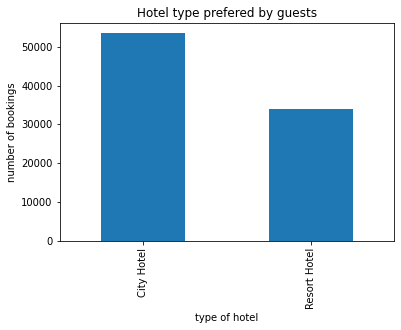

In [17]:
hotel_type_count.plot(kind='bar')                     #visualization
plt.title('Hotel type prefered by guests')            #bar plot
plt.ylabel('number of bookings')
plt.xlabel('type of hotel')

***as we can see from fig. that city hotels have most bookings as compared to resort hotels***

# ***2)best agents***

In [18]:
# bookings made by different agent
bookings_made= df_new.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns={'count': "Bookings_made" }).sort_values(by='Bookings_made',ascending=False)
bookings_made

,agent,Bookings_made
9,9.0,28759
174,240.0,13028
0,0.0,12193
14,14.0,3349
7,7.0,3300
...,...,...
213,295.0,1
193,265.0,1
161,213.0,1
299,444.0,1


In [19]:
ten_best_agents = bookings_made[:10]

In [20]:
ten_best_agents

,agent,Bookings_made
9,9.0,28759
174,240.0,13028
0,0.0,12193
14,14.0,3349
7,7.0,3300
183,250.0,2779
175,241.0,1644
27,28.0,1502
8,8.0,1383
1,1.0,1232


Text(0.5, 1.0, 'best agents(top 10 only')

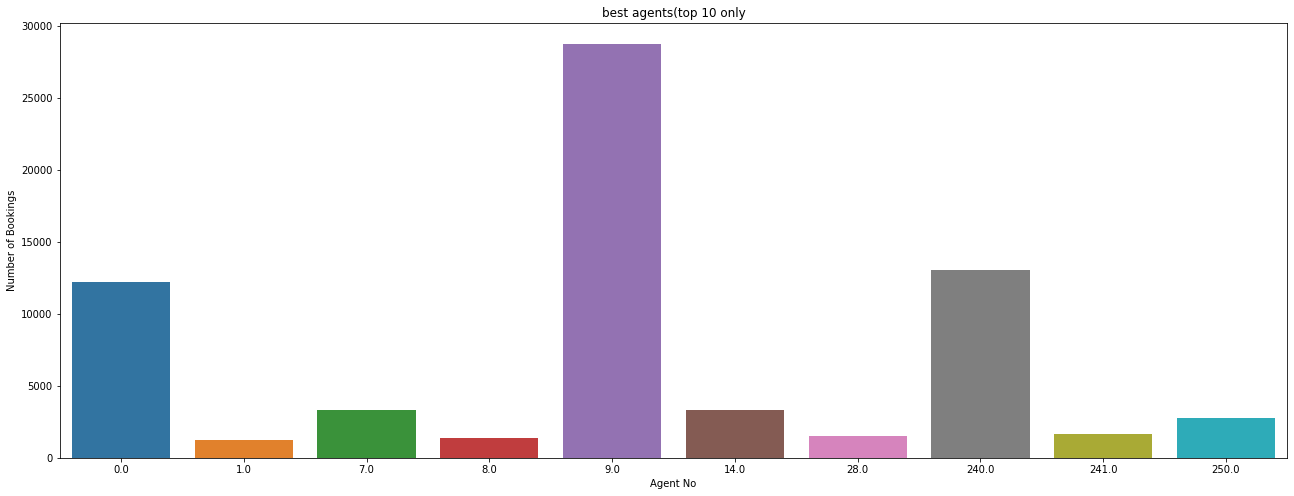

In [21]:
#plotting the graqph for best agents(top 10 only)

plt.figure(figsize=(22,8))
sns.barplot(x=ten_best_agents['agent'] ,y=ten_best_agents['Bookings_made']) # ,order=ten_best_agents['agent'])
plt.xlabel('Agent No')
plt.ylabel('Number of Bookings')
plt.title("best agents(top 10 only")

***from the above figure we can conclude that agent with id(9.0) is the most preferred agent by guest***

# ***3) Most Preferable meal category by guests***

In [22]:
preferred_meal= df_new.groupby(['meal'])['meal'].agg({'count'}).reset_index().rename(columns={'count': "preferred meal count" })

In [23]:
preferred_meal


,meal,preferred meal count
0,BB,67978
1,FB,360
2,HB,9085
3,SC,9481
4,Undefined,492


Text(0.5, 1.0, 'meals prefered by guests')

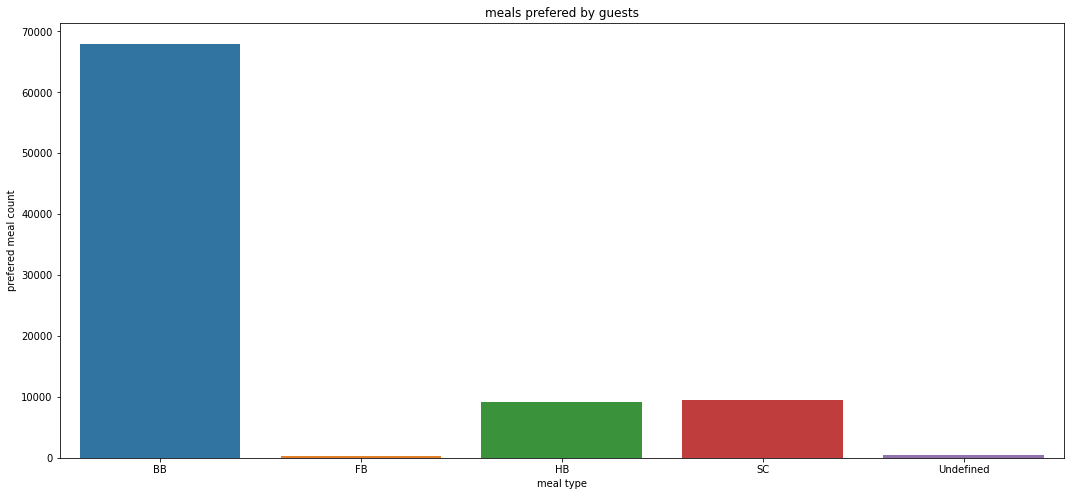

In [24]:
plt.figure(figsize=(18,8))
sns.barplot(x=preferred_meal['meal'] ,y=preferred_meal['preferred meal count'],order=preferred_meal['meal'] )
plt.xlabel('meal type')
plt.ylabel('prefered meal count')
plt.title("meals prefered by guests")

types of meal:

FB : Full board includes bed, breakfast, packed lunch and evening meal.

HB : Half Board includes bed, breakfast and evening meal (no packed lunch).

BB : Bed and breakfast includes bed and breakfast only.

SC : Self-catering. The meals aren’t included in the price, but the guests have access to the kitchen or kitchenette, where they can prepare the meals on their own. It’s the best option if you want to save a little or you have a restrictive diet.


*** from the figure we can conclude that the most preferred meal is BB, which can also gives us the hint that most customers are not planning their trip for long***

# ***4) Most preferred room type ***

Text(0.5, 1.0, 'Most preferred Room type')

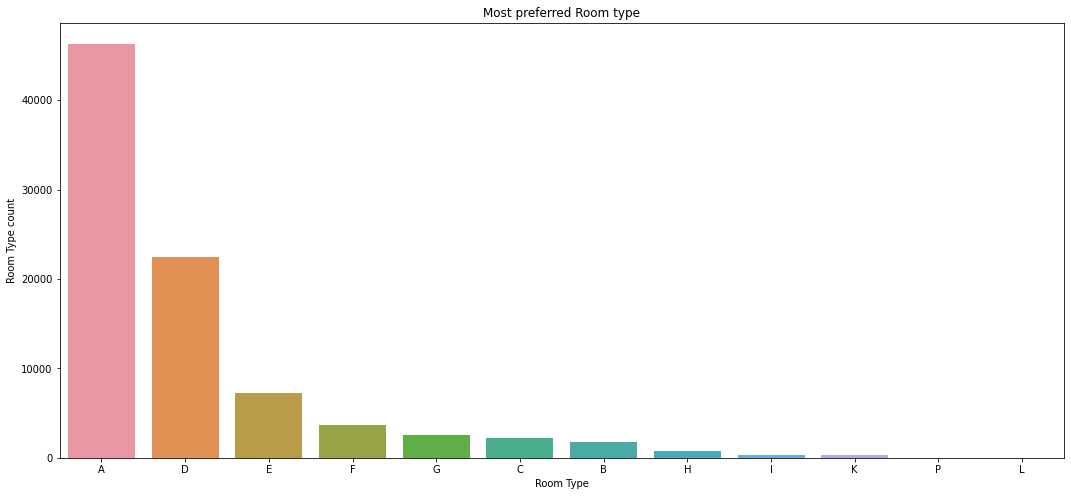

In [25]:
#set plotsize
plt.figure(figsize=(18,8))
#plotting 
sns.countplot(x=df_new['assigned_room_type'],order=df_new['assigned_room_type'].value_counts().index)
#  set xlabel for the plot
plt.xlabel('Room Type')
# set y label for the plot
plt.ylabel('Room Type count')
#set title for the plot
plt.title("Most preferred Room type")

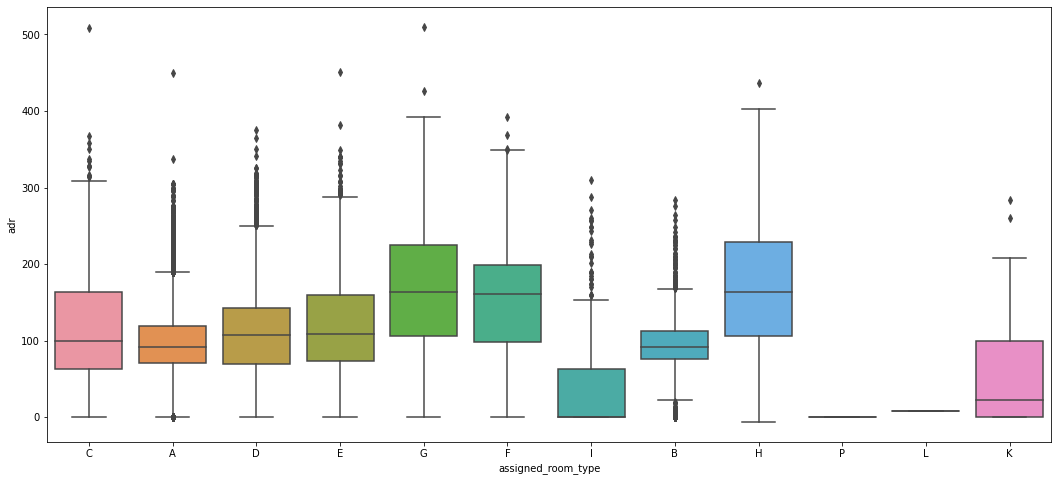

In [26]:
# lets find which room type have high adr

#for better understansing i am dropping a outlier
df_new.drop(df_new[df_new['adr']>5000].index,inplace=True)

#plotting
plt.figure(figsize=(18,8))
sns.boxplot( x = df_new['assigned_room_type'], y = df_new['adr'])
plt.show()


**from fig. we can conclude that most preferred room type is A and rooms with best adr are G ,F, H so hotels must try to increase booking in rooms category G, F, H**

# ***5) Number of guests from diffrent Countries***

Text(0.5, 1.0, 'Number of guests from diffrent Countries')

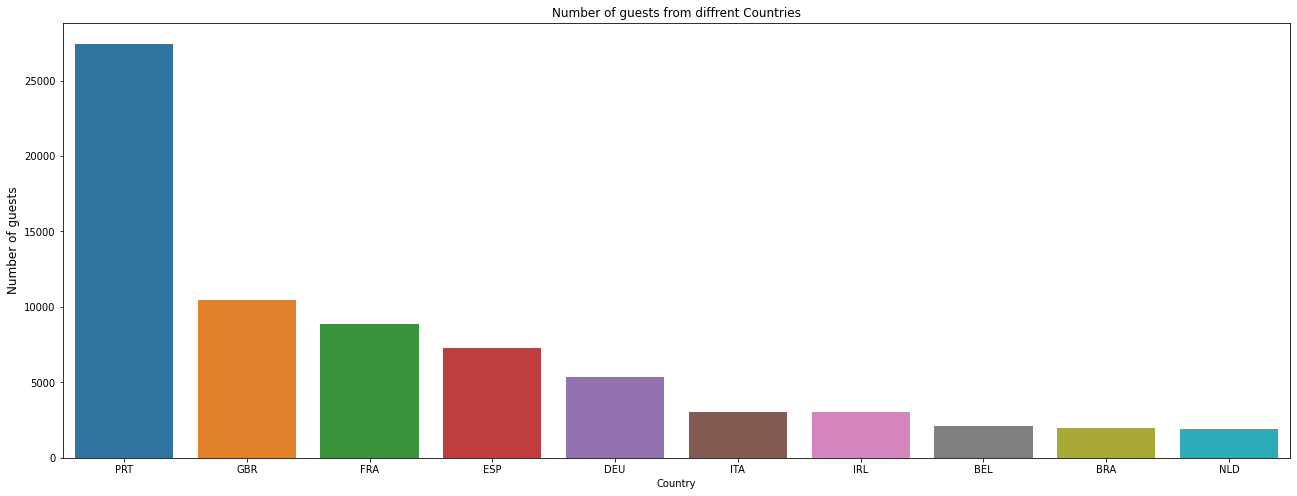

In [27]:
# counting nof of guests from different countries
df1=df_new['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count of guests'})[:10]

#VISUALIZATION
plt.figure(figsize=(22,8))
sns.barplot(x=df1['country'],y=df1['count of guests'])
plt.xlabel('Country')
plt.ylabel('Number of guests',fontsize=12)
plt.title("Number of guests from diffrent Countries")


from the fig, we can conclude that Most of the customers come from Portugal, Great Britain, France and Spain.

# ***6)Monthly Bookings***

In [28]:
# groupby arrival_date_month and taking the hotel count
bookings_by_months=df_new.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"bookings"})

# Create list of months in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']     

# creating df which will map the order of above months list without changing its values.
bookings_by_months['arrival_date_month']=pd.Categorical(bookings_by_months['arrival_date_month'],categories=months,ordered=True)        #googled
                                                                                                                        
# sorting by arrival_date_month
bookings_by_months =bookings_by_months.sort_values('arrival_date_month')

bookings_by_months


,arrival_date_month,bookings
4,January,4693
3,February,6098
7,March,7512
0,April,7908
8,May,8355
6,June,7765
5,July,10057
1,August,11257
11,September,6690
10,October,6934


Text(0, 0.5, 'Number of bookings')

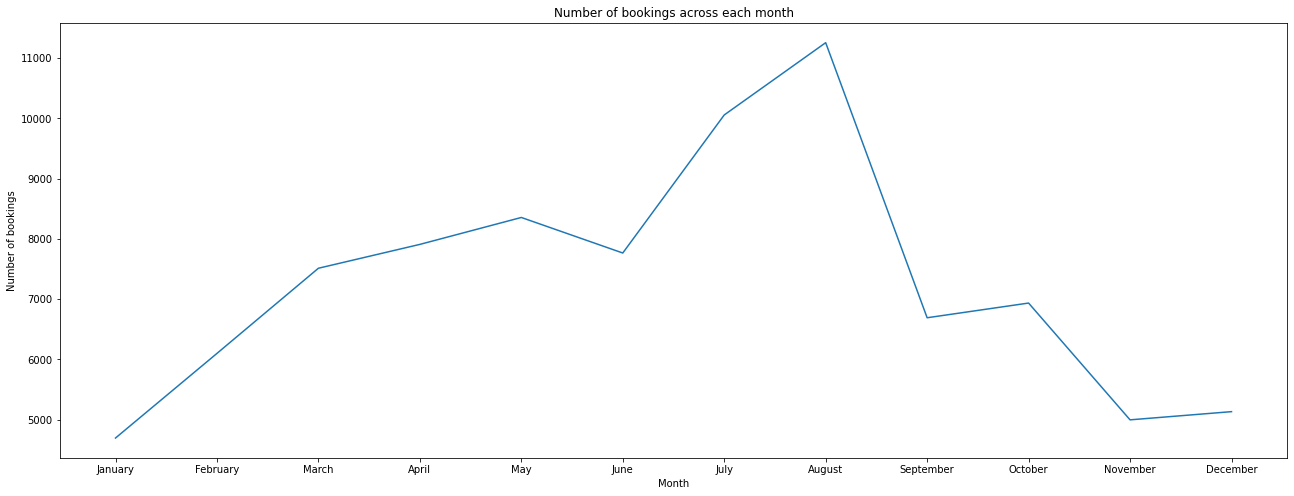

In [29]:
#set plot size
plt.figure(figsize=(22,8))

#pltting lineplot on x- months & y- booking counts
sns.lineplot(x=bookings_by_months['arrival_date_month'],y=bookings_by_months['bookings'])

# set title for the plot
plt.title('Number of bookings across each month')
#set x label
plt.xlabel('Month')
#set y label
plt.ylabel('Number of bookings')

**July and August months had the most Bookings while november,december and january have less bookings**

# ***7)Mostly used distribution channel for booking***

In [30]:
df1= df_new['distribution_channel'].value_counts().reset_index().rename(columns={'index':"distribution_channel",'distribution_channel':'count'})
df1

,distribution_channel,count
0,TA/TO,69140
1,Direct,12988
2,Corporate,5081
3,GDS,181
4,Undefined,5


Text(0.5, 1.0, 'bookings from different distribution channels')

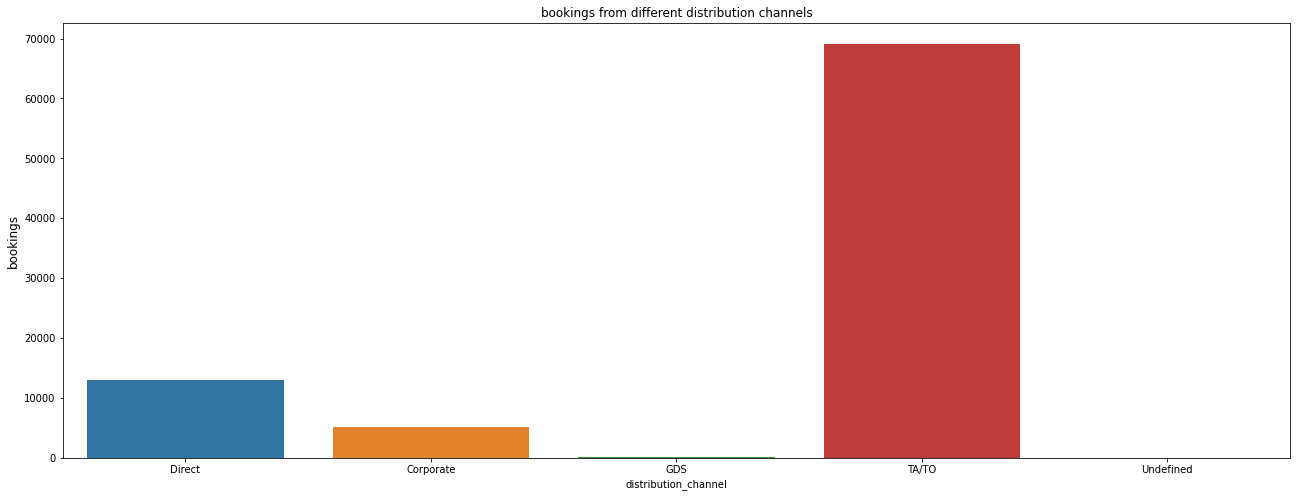

In [31]:

#VISUALIZATION
plt.figure(figsize=(22,8))
sns.barplot(x=df1['distribution_channel'],y=df1['count'],order=['Direct','Corporate','GDS','TA/TO','Undefined'])
plt.xlabel('distribution_channel')
plt.ylabel('bookings',fontsize=12)
plt.title("bookings from different distribution channels")


**TA/TO is most used distribution channel**

# ***8)distribution channel contribution to adr***

Text(0.5, 1.0, 'ADR across Distribution channel')

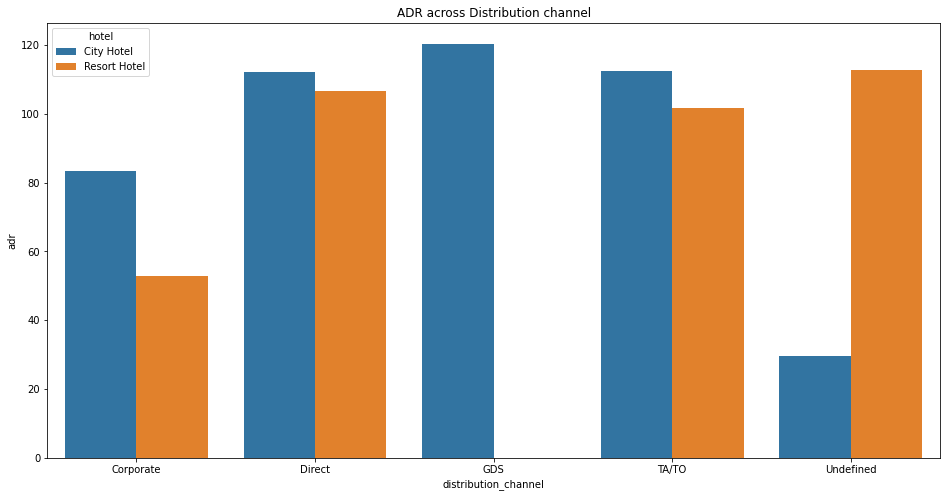

In [32]:
# groupby distribution channel and hotel and taking avg. adr

df1=df_new.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()

# set plot size and plot barchart(visualization)

plt.figure(figsize=(16,8))
sns.barplot(x='distribution_channel', y='adr', data=df1, hue='hotel')
plt.title('ADR across Distribution channel')



1.  Corporate -These are corporate hotel booing companies which makes bookings possible.

2.     GDS    -Global distribution systems 

3.  Direct    -means that bookings are directly made with the respective hotels

4.  TA/TO     -means through travel agents or travel operators.
5.  Undefined -Bookings are undefined. may be on arrival.






**from the figure we can conclude that 'Direct' and 'TA/TO' has most and almost equally contribution in adr in both type of hotels.
GDS is also contributing highly in adr but only in'City Hotel' type.**

# ***9)Distribution channel with high cancelation_percentage(%)***

Text(0.5, 1.0, 'Cancellation Rate across Distribution channels')

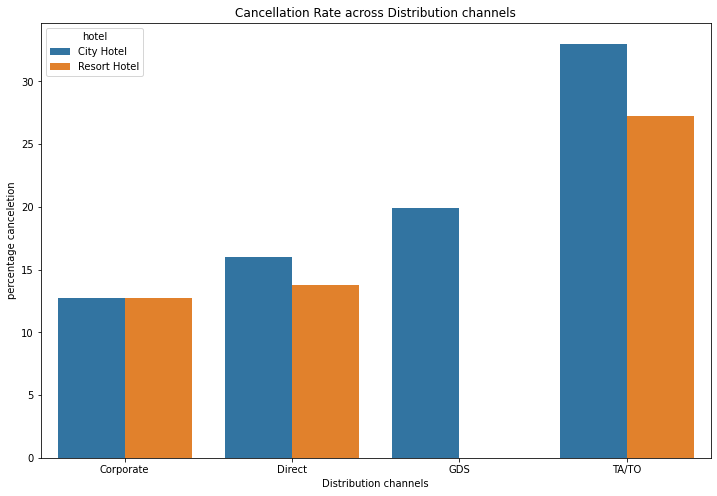

In [33]:
 # 1= canceled
 # 0 = not canceled
canceled_booking=df_new[df_new['is_canceled']==1]

#groupby distribution channel and hotel 
# droping undefined as its has only 4 values and we cant predict much about that data
canceled_booking=canceled_booking.groupby(['distribution_channel','hotel']).size().drop(index = 'Undefined').reset_index().rename(columns={0:'Counts'})
# adding 'total booking column for calculating the percentage.
canceled_booking['total_bookings']=df_new.groupby(['distribution_channel','hotel']).size().drop(index = 'Undefined').reset_index().rename(columns={0:"total_bookings"}).drop(['distribution_channel','hotel'],axis=1)
canceled_booking

#set plot size and plot barchart (visualization)
plt.figure(figsize=(12,8))
sns.barplot(x='distribution_channel',y=canceled_booking['Counts']*100/canceled_booking['total_bookings'],hue="hotel",data=canceled_booking)

# set labels
plt.xlabel('Distribution channels')
plt.ylabel('percentage canceletion')
plt.title('Cancellation Rate across Distribution channels')

**TA/TO  has the most percentage of cancelation which is around 30% , which can predict that30% bookings via TA/TO may get cancelled thus a hotel must  plan according to that.**

**one more thing to note is that city hotels have more cancelations as compare to resorts**

# ***10) cencelation rate across different market_segments***

Text(0.5, 1.0, 'Cancellation Rate across different market_segment')

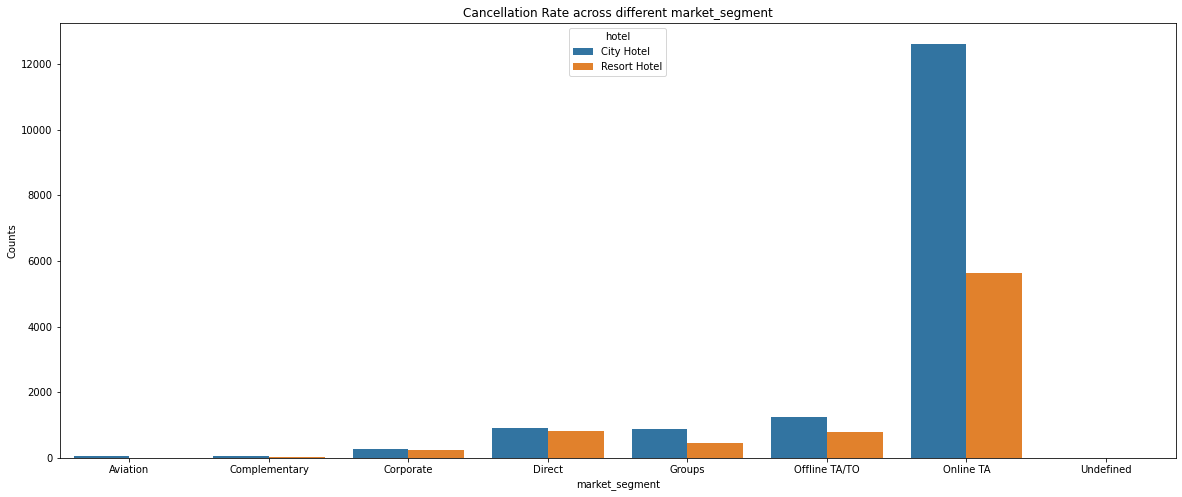

In [34]:
 # 1= canceled
 # 0 = not canceled

df_MS = df_new[df_new['is_canceled']==1]   
# group by market_segment and hotel
df_MS = df_MS.groupby(['market_segment','hotel']).size().reset_index().rename(columns={0:'counts'})  

#set plotsizde and plot barchart
plt.figure(figsize=(20,8))
sns.barplot(x='market_segment',y='counts',hue="hotel",data= df_MS)

# set labels
plt.xlabel('market_segment')
plt.ylabel('Counts')
plt.title('Cancellation Rate across different market_segment')

**from the figure we can conclude that bookings from online_TA gets canceled more than any other market_segment**

# ***CONCLUSIONS :***

**1. overall city hotels have most bookings as compared to resort hotels**

**2. most bookings comes through agent with id(9.0)**

**3. the most preferred meal is BB, which can also gives us the hint that most customers are not planning their trip for long**

**4. most preferred room type is A and rooms with best adr are G ,F, H**

**5. we can conclude that Most of the customers come from Portugal followed by Great Britain, France and Spain.**

**6. July and August months had the most Bookings while november,december and january have less bookings**

**7. TA/TO is most used distribution channel**

**8. 'Direct' and 'TA/TO' has most and almost equally contribution in adr in both type of hotels. GDS is also contributing highly in adr but only in'City Hotel' type.**

**9. the most percentage of cancelation which is around 30% , which can predict that30% bookings via TA/TO may get cancelled thus a hotel must plan according to that.**

**one more thing to note is that city hotels have more cancelations as compare to resorts**

**10. the bookings from online_TA gets canceled more than any other market_segment**